# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 0: Load and understand the dataset & Select and clean an African subset

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Here is the link to the dataset on kaggle:
# https://www.kaggle.com/datasets/nicolasgonzalezmunoz/world-bank-world-development-indicators


data = pd.read_csv('/content/world_bank_development_indicators.csv')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17272 entries, 0 to 17271
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    17272 non-null  object 
 1   date                                       17272 non-null  object 
 2   agricultural_land%                         14714 non-null  float64
 3   forest_land%                               8176 non-null   float64
 4   land_area                                  14930 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9195 non-null   float64
 7   control_of_corruption_estimate             4783 non-null   float64
 8   control_of_corruption_std                  4783 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvable_energy_cons

In [68]:
data.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN


In [69]:
data['country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica'

The result of the cell above shows us that the dataset contains data from all over the world (from counties or groups of countries). However, as we need an Africanized data, we have to create a subset that is constitued only of African countries individually.

In [70]:
african_countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic",
    "Chad", "Comoros", "Congo, Rep.", "Cote d'Ivoire", "Congo, Dem. Rep.", "Djibouti", "Egypt, Arab Rep.", "Equatorial Guinea",
    "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia, The", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia",
    "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria",
    "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan",
    "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"

]

african_data = data[data['country'].isin(african_countries)].reset_index(drop=True)
african_data.head()

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Algeria,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,48.722,23.785,40.532,11394307.0,7917904.0,NaN,NaN,NaN
1,Algeria,1961-01-01,19.091505,NaN,2381740.0,89.0,NaN,NaN,NaN,NaN,...,NaN,NaN,48.634,23.723,40.516,11598608.0,7910599.0,NaN,NaN,NaN
2,Algeria,1962-01-01,18.851764,NaN,2381740.0,89.0,NaN,NaN,NaN,NaN,...,NaN,NaN,48.680,25.046,39.323,11778260.0,7866229.0,NaN,NaN,NaN
3,Algeria,1963-01-01,18.688018,NaN,2381740.0,89.0,NaN,NaN,NaN,NaN,...,NaN,NaN,48.593,22.615,42.908,11969451.0,7820600.0,NaN,NaN,NaN
4,Algeria,1964-01-01,18.542746,NaN,2381740.0,89.0,NaN,NaN,NaN,NaN,...,NaN,NaN,48.392,22.917,42.788,12179099.0,7777451.0,NaN,NaN,NaN


In [71]:
len(african_data['country'].unique())

54

In [72]:
african_data['country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Djibouti', 'Egypt, Arab Rep.',
       'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
       'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
       'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

from the last two cells, We can see that all 54 African countries are present. **Let's now explore the subset and deal with Null values**

In [73]:
african_data.shape

(3456, 50)

In [74]:
african_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    3456 non-null   object 
 1   date                                       3456 non-null   object 
 2   agricultural_land%                         3211 non-null   float64
 3   forest_land%                               1703 non-null   float64
 4   land_area                                  3211 non-null   float64
 5   avg_precipitation                          3074 non-null   float64
 6   trade_in_services%                         1923 non-null   float64
 7   control_of_corruption_estimate             1285 non-null   float64
 8   control_of_corruption_std                  1285 non-null   float64
 9   access_to_electricity%                     1399 non-null   float64
 10  renewvable_energy_consum

In [75]:
african_data.describe()

,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
count,3211.000000,1703.000000,3.211000e+03,3074.000000,1923.000000,1285.000000,1285.000000,1399.000000,1673.000000,1199.000000,...,20.000000,255.000000,3337.000000,3337.000000,3328.000000,3.402000e+03,3.402000e+03,1284.000000,1284.000000,438.000000
mean,42.282637,29.688872,5.593440e+05,1024.493494,18.870283,-0.634385,0.192929,42.278927,62.274907,553.739417,...,39.679500,42.693333,40.805200,14.702340,53.127810,1.327775e+07,8.662375e+06,-0.644984,0.145951,8.680935
std,21.872896,25.415606,6.191020e+05,718.743859,17.312332,0.632256,0.059228,29.781584,29.960141,840.137146,...,18.842625,8.030002,8.729137,6.713609,9.599656,2.182470e+07,1.372734e+07,0.739857,0.037607,10.873568
min,2.445869,0.044010,4.600000e+02,18.100000,0.621025,-1.936706,0.124475,0.533899,0.060000,10.361416,...,7.000000,27.600000,10.100000,4.187000,12.407000,4.170000e+04,3.016000e+04,-2.226054,0.103716,0.267518
25%,26.113743,10.323408,5.439000e+04,346.000000,9.627585,-1.101504,0.151591,16.052720,39.200000,84.428608,...,31.167500,37.300000,36.338000,9.427000,46.024750,1.707722e+06,9.732172e+05,-1.211511,0.120269,2.000885
50%,44.382753,23.267229,3.180000e+05,1020.000000,14.082619,-0.707866,0.174068,36.800000,74.360000,180.384566,...,43.850000,41.500000,43.083000,13.753000,52.830000,5.809292e+06,4.205350e+06,-0.715530,0.129839,4.701295
75%,59.180536,46.014954,8.858000e+05,1513.000000,21.110163,-0.266752,0.218895,62.050000,86.560000,752.928637,...,53.775000,46.550000,46.995000,18.845000,59.799750,1.478458e+07,1.014235e+07,-0.130259,0.157385,10.908931
max,87.965116,96.226381,2.381741e+06,3200.000000,169.248374,1.698149,0.737861,100.000000,98.340000,4766.652371,...,65.100000,65.800000,58.121000,103.534000,77.236585,2.185412e+08,1.015758e+08,1.007172,0.323908,61.103416


In [76]:
# Let's print out columns with the most Null values
african_data.isna().sum().sort_values(ascending=False).head(10)

,0
multidimensional_poverty_headcount_ratio%,3436
doing_business,3402
time_to_get_operation_license,3363
human_capital_index,3295
research_and_development_expenditure%,3236
central_goverment_debt%,3218
gini_index,3201
logistic_performance_index,3160
statistical_performance_indicators,3105
intentional_homicides,3018


Let's drop columns that are too sparse. We'll consider a column too sparce if **more than 60% of values are missing**, as they do not provide sufficient information for reliable dimensionality reduction.

In [77]:
# Let's first Identify numeric and non-numeric columns
numeric_cols = african_data.select_dtypes(include=[np.number]).columns
non_numeric_cols = african_data.select_dtypes(exclude=[np.number]).columns

In [78]:
# Percentage of missing values
missing_ratio = african_data[numeric_cols].isna().mean()

# Columns to drop
cols_to_drop = missing_ratio[missing_ratio > 0.6].index
print("The columns to drop are:")
cols_to_drop

The columns to drop are:


Index(['control_of_corruption_estimate', 'control_of_corruption_std',
       'electric_power_consumption', 'real_interest_rate',
       'risk_premium_on_lending', 'research_and_development_expenditure%',
       'central_goverment_debt%', 'tax_revenue%', 'expense%',
       'goverment_effectiveness_estimate', 'goverment_effectiveness_std',
       'human_capital_index', 'doing_business',
       'time_to_get_operation_license', 'statistical_performance_indicators',
       'logistic_performance_index', 'political_stability_estimate',
       'political_stability_std', 'rule_of_law_estimate', 'rule_of_law_std',
       'regulatory_quality_estimate', 'regulatory_quality_std',
       'government_expenditure_on_education%',
       'government_health_expenditure%',
       'multidimensional_poverty_headcount_ratio%', 'gini_index',
       'voice_and_accountability_estimate', 'voice_and_accountability_std',
       'intentional_homicides'],
      dtype='object')

In [79]:
# Lt's create a copy so that we can keep the one we have unchanged
african_data_clean = african_data.copy()
# Drop the columns
african_data_clean = african_data_clean.drop(columns=cols_to_drop)

In [80]:
african_data_clean.shape

(3456, 21)

We just drop all columns that are too sparse (29 columns), as they are **Zero-variance** columns. This means that:
- They contribute nothing to covariance
- They can cause numerical instability, and
- They produce zero eigenvalues

Therefore, it is safer for us to drop them before PCA. Now the dataset remains with only 21 columns

For the remaing columns we're gonna use **Mean imputation**. This means, replace all null values of a column by the mean of that column.

In [81]:
numeric_cols = african_data_clean.select_dtypes(include=[np.number]).columns

african_data_clean[numeric_cols] = african_data_clean[numeric_cols].fillna(
    african_data_clean[numeric_cols].mean()
)

In [82]:
african_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         3456 non-null   object 
 1   date                            3456 non-null   object 
 2   agricultural_land%              3456 non-null   float64
 3   forest_land%                    3456 non-null   float64
 4   land_area                       3456 non-null   float64
 5   avg_precipitation               3456 non-null   float64
 6   trade_in_services%              3456 non-null   float64
 7   access_to_electricity%          3456 non-null   float64
 8   renewvable_energy_consumption%  3456 non-null   float64
 9   CO2_emisions                    3456 non-null   float64
 10  other_greenhouse_emisions       3456 non-null   float64
 11  population_density              3456 non-null   float64
 12  inflation_annual%               34

In [83]:
# Let's verify if the number of null values in the 'african_data_clean' dataset is 0
african_data_clean.isna().sum().sum()

np.int64(0)

From the  two last cells above, we can confirm that there is no null values anymore in our datasets.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

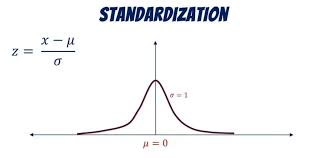


In [85]:
# Let's take df as the dataset ready for PCA (with numerical columns only)
df = african_data_clean[numeric_cols]

In [86]:
df.shape

(3456, 19)

In [87]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
# Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
df_mean = df.mean()
df_std = df.std()

standardized_data = (df-df_mean)/df_std
standardized_data[:5]  # Display the first few rows of standardized data

,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,access_to_electricity%,renewvable_energy_consumption%,CO2_emisions,other_greenhouse_emisions,population_density,inflation_annual%,individuals_using_internet%,military_expenditure%,GDP_current_US,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population
0,0.000000,0.0,0.000000,0.000000,2.751389e-16,0.0,-6.818396e-16,0.0,1.300309e-16,7.636510e-17,1.679153e-17,-1.579719e-16,2.008268e-16,-0.338882,0.922974,1.376791,-1.337113,-0.086981,-0.054662
1,-1.099986,0.0,3.053881,-1.380096,2.751389e-16,0.0,-6.818396e-16,0.0,1.300309e-16,-6.332320e-01,1.679153e-17,-1.579719e-16,2.008268e-16,-0.344706,0.912714,1.367393,-1.338811,-0.077546,-0.055198
2,-1.111357,0.0,3.053881,-1.380096,2.751389e-16,0.0,-6.818396e-16,0.0,1.300309e-16,-6.324213e-01,1.679153e-17,-1.579719e-16,2.008268e-16,-0.353442,0.918077,1.567939,-1.465455,-0.069249,-0.058456
3,-1.119124,0.0,3.053881,-1.380096,2.751389e-16,0.0,-6.818396e-16,0.0,1.300309e-16,-6.315586e-01,1.679153e-17,-1.579719e-16,6.239611e-02,-0.339298,0.907934,1.199437,-1.084888,-0.060420,-0.061806
4,-1.126014,0.0,3.053881,-1.380096,2.751389e-16,0.0,-6.818396e-16,0.0,1.300309e-16,-6.306126e-01,1.679153e-17,-1.579719e-16,5.078202e-01,-0.335138,0.884501,1.245216,-1.097626,-0.050738,-0.064974


Standardization ensures that all features contribute equally to the PCA, preventing variables with larger scales from dominating.

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [90]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.cov(standardized_data.T)  # Calculate covariance matrix
cov_matrix

array([[ 1.00000000e+00, -3.52078984e-01, -2.51262595e-01,
        -1.74268051e-01, -1.38620042e-01, -9.64508854e-02,
         1.07152244e-01,  6.22411138e-02,  3.08093819e-02,
         2.83210388e-01, -3.73950511e-02, -1.24401176e-02,
        -9.88388853e-03,  9.41836519e-02, -3.54109033e-02,
        -5.84975626e-02, -6.87623360e-03,  7.77629531e-02,
         8.27461196e-02],
       [-3.52078984e-01,  1.00000000e+00, -1.62369253e-01,
         5.03190042e-01,  1.61066306e-01, -5.02905742e-02,
         2.33531104e-01, -1.96622240e-01, -2.12905193e-01,
        -9.08483182e-02,  6.18628078e-02, -3.74393967e-02,
        -6.48858521e-02, -1.61339482e-01,  1.29421879e-01,
         6.96964180e-02, -9.50831783e-02, -1.22650730e-01,
        -1.20314800e-01],
       [-2.51262595e-01, -1.62369253e-01,  1.00000000e+00,
        -3.87811186e-01, -2.59898744e-01, -1.92625033e-02,
        -4.70383044e-02,  2.29833225e-01,  3.47066243e-01,
        -3.72268618e-01,  7.76891638e-02, -3.14136985e-02,
    

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [107]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([4.64836892, 3.35054283, 1.80490273, 1.70911243, 1.46302121,
        0.99611031, 0.94090739, 0.83595964, 0.7356386 , 0.62117261,
        0.01228645, 0.03090798, 0.0346213 , 0.43608122, 0.39997029,
        0.34279143, 0.1896383 , 0.20502588, 0.24294048]),
 array([[ 3.78283203e-02,  2.52755618e-02,  2.98057768e-01,
          4.02433297e-01, -4.48621379e-01, -1.46764207e-01,
          2.87293912e-02,  7.55163491e-02,  1.40788353e-01,
         -3.65752875e-01, -2.06642176e-03,  4.99699922e-02,
          3.51273871e-02, -1.41804210e-01, -4.10614077e-01,
         -4.12244250e-01, -3.25062788e-02, -2.68263370e-02,
         -6.66973741e-03],
        [-1.48166877e-01, -7.38842774e-02,  8.41007900e-02,
         -5.32873922e-01,  2.44182716e-01,  6.10676152e-02,
          6.29429918e-02,  1.85186496e-01,  2.70445234e-01,
         -2.49619465e-01, -2.23896107e-02,  1.47266549e-02,
          3.66287765e-02, -2.64168867e-01, -5.11071252e-01,
          2.03840630e-01, -9.51427380e-03, -1.09148

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [108]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices] # Sort eigenvalues in descending order

sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
sorted_eigenvectors

array([[ 3.78283203e-02,  2.52755618e-02,  2.98057768e-01,
         4.02433297e-01, -4.48621379e-01, -1.46764207e-01,
         2.87293912e-02,  7.55163491e-02,  1.40788353e-01,
        -3.65752875e-01, -1.41804210e-01, -4.10614077e-01,
        -4.12244250e-01, -6.66973741e-03, -2.68263370e-02,
        -3.25062788e-02,  3.51273871e-02,  4.99699922e-02,
        -2.06642176e-03],
       [-1.48166877e-01, -7.38842774e-02,  8.41007900e-02,
        -5.32873922e-01,  2.44182716e-01,  6.10676152e-02,
         6.29429918e-02,  1.85186496e-01,  2.70445234e-01,
        -2.49619465e-01, -2.64168867e-01, -5.11071252e-01,
         2.03840630e-01, -2.40635712e-01, -1.09148506e-01,
        -9.51427380e-03,  3.66287765e-02,  1.47266549e-02,
        -2.23896107e-02],
       [ 1.34106042e-01,  2.84440253e-01, -2.44878125e-01,
         7.00457376e-02,  3.89623585e-01,  1.81639453e-02,
        -9.40693737e-02, -1.95178354e-01, -1.19821319e-01,
         2.30908872e-01,  3.24448234e-01, -5.80596628e-01,
    

**Explained variance & dynamic component selection**

In [109]:
# Explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
explained_variance_ratio

array([0.244651  , 0.17634436, 0.09499488, 0.08995329, 0.07700112,
       0.05242686, 0.04952144, 0.04399788, 0.03871782, 0.0326933 ,
       0.00064666, 0.00162674, 0.00182217, 0.02295164, 0.02105107,
       0.01804165, 0.00998096, 0.01079084, 0.01278634])

In [110]:
# Cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)
cumulative_variance

array([0.244651  , 0.42099536, 0.51599024, 0.60594352, 0.68294464,
       0.7353715 , 0.78489294, 0.82889081, 0.86760863, 0.90030193,
       0.90094858, 0.90257532, 0.90439749, 0.92734914, 0.94840021,
       0.96644186, 0.97642282, 0.98721366, 1.        ])

**The explained variance ratio** indicates the proportion of total variance captured by each principal component, reflecting its relative importance. **The cumulative variance** represents the total variance retained when considering the first k components. By selecting the smallest number of principal components that achieve a predefined cumulative variance threshold (**in my case 90%**), we ensure effective dimensionality reduction while preserving most of the original data information.

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [111]:
# Step 6: Project Data onto Principal Components
num_components = 10
reduced_data = standardized_data @ sorted_eigenvectors[:, :num_components]  # Project data onto the principal components
#reduced_data[:5]

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [112]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (3456, 10)


,0,1,2,3,4,5,6,7,8,9
0,-1.125387,1.011220,-0.621077,-0.518762,-1.076089,-0.216809,0.147033,-0.543019,-0.192787,0.231791
1,-0.619699,2.201329,-2.361079,-0.061777,0.875397,0.077747,-0.327047,-1.423139,-0.728094,0.630135
2,-0.705083,2.297282,-2.424301,-0.130381,0.760153,0.051533,-0.304206,-1.486749,-0.755054,0.668259
3,-0.505630,2.079189,-2.305003,0.018216,1.043566,0.094323,-0.303867,-1.340389,-0.686343,0.610607
4,-0.518085,2.113851,-2.416134,0.082530,1.081610,-0.047006,0.057528,-1.234791,-0.573966,0.676677


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

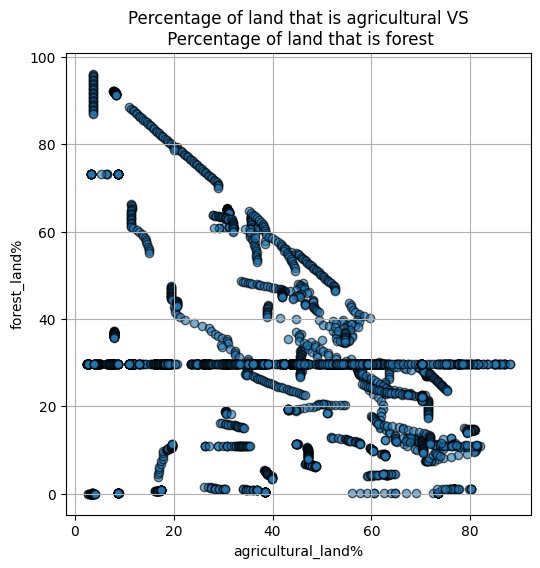

In [118]:
# Visualization Before PCA
# Plot original data (first two features for simplicity)

features_to_plot = ['agricultural_land%', 'forest_land%']

plt.figure(figsize=(6,6))
plt.scatter(african_data_clean[features_to_plot[0]], african_data_clean[features_to_plot[1]], alpha=0.6, edgecolor='k')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
plt.title('Percentage of land that is agricultural VS\n Percentage of land that is forest')
plt.grid(True)
plt.show()

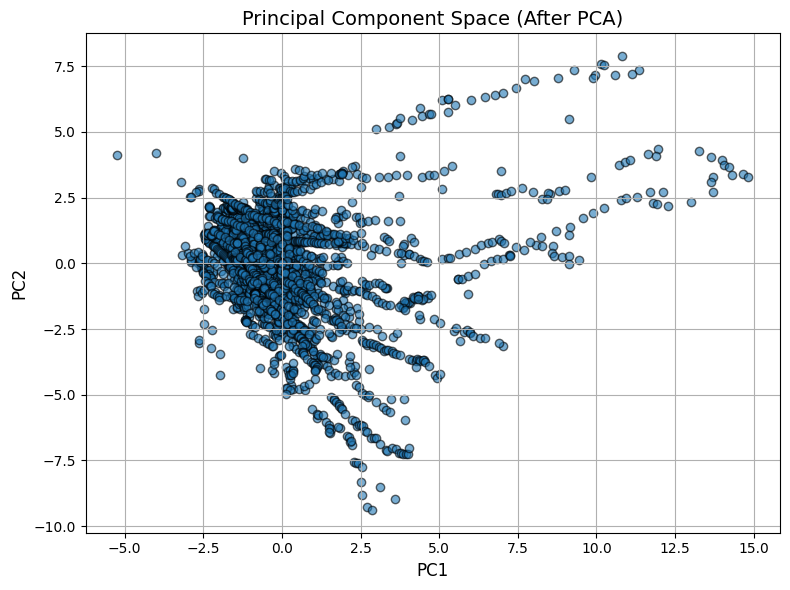

In [119]:
# Visualization After PCA
# We're going to plot reduced data (PC1, PC2) after PCA

# reduced_data.iloc[:, 0] = PC1, reduced_data.iloc[:, 1] = PC2

plt.figure(figsize=(8,6))
plt.scatter(reduced_data.iloc[:, 0], reduced_data.iloc[:, 1], alpha=0.6, edgecolor='k')
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('Principal Component Space (After PCA)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

**Explanation of PCA effects:**
<p>Principal Component Analysis (PCA) transforms the original feature space into a new set of orthogonal axes called principal components. Each principal component captures the maximum possible variance remaining in the data, with PC1 capturing the highest variance, PC2 the second highest, and so on.

In the “after PCA” scatter plot, the original data points have been rotated and projected onto the first two principal components. This preserves the overall structure and relative distances between points, while concentrating the variance along the axes with the most information (PC1 and PC2).

Clusters or patterns that existed in the original feature space remain visible, but the orientation has changed because PCA seeks directions of maximum variance. By projecting the data onto these components, we achieve dimensionality reduction while retaining most of the information. This is why the number of points remains the same, and the spread along PC1 demonstrates that it captures the largest variance.